In [51]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats
import pickle

import etroc1_array

In [52]:
##############  6f fC  ##########################
# path = './data/merged_power/P15_DAC_Scan_QInj=1M25_Merged_Power'  # bare ETROC1 baord1 Pixle=15, phaseAdj=50
# path = './data/merged_power/P10_DAC_Scan_QInj=1M25_Merged_Power'  # bare ETROC1 baord1 Pixle=10, phaseAdj=50
# path = './data/merged_power/P5_DAC_Scan_QInj=1M25_Merged_Power'  # bare ETROC1 baord1 Pixle=5, phaseAdj=50
# path = './data/merged_power/P0_DAC_Scan_QInj=1M25_Merged_Power'  # bare ETROC1 baord1 Pixle=5, phaseAdj=50

# path = './data/producibility_and_crosstalk/P15_uniformity_QInj=1M25_Merged_Power_5fc'  # pix 14 turn-off
path = './data/producibility_and_crosstalk/P15_crosstalk_QInj=1M25_Merged_Power_5fc'  # pix 14 turn-on every other run




file_in = 'Array_T_Pixel=15_DAC_P15=441_QSel=20_CLSel=0_RfSel=2_IBSel=7_PhaseAdj=140_B2_200000_09-02_11-14-22.dat'

pixel_index='Pix15'
board_index='B3'





datapath = os.listdir(path)
# print(datapath)
file_in = [item for item in datapath if item.split('.')[1]=='dat']

# f_r = open('\\\\?\\'+os.path.abspath(path) +'\\'+ file_in[0], 'r')
# lines = f_r.readlines()
# f_r.close()

# print(lines[0:20])

# print(file_in)
num_file = len(file_in)

# qinj_base = 16    ##  2.5 MHz Qinj frequency
# qinj_base = 2       ##  20 MHz
# qinj_base = 100       ##  400 kHz
qinj_base = 32       ##  1.25 MHz

# toa=np.array([0]*num_file)
# print('toa is',toa)

# print(file_in)



toa_list = []
toa_mu_list = []
toa_std_list = []
tot_list = []
tot_mu_list = []
tot_std_list = []
cal_list = []
cal_mu_list = []
cal_std_list = []
hitposition_list = []
hitposition_mod_list = []
phase_list=[]
events_list = []
DAC_list = []
hits_list = []
i=0
for item in tqdm(file_in):
#     f_r = open('\\\\?\\'+os.path.abspath(path) + file_in[i], 'r')
    f_r = open('\\\\?\\'+os.path.abspath(path) +'\\'+ file_in[i], 'r')
    lines = f_r.readlines()
    f_r.close()
    
    num_lines = len(lines)
    
#     print('number of lines is', num_lines)
    
    word_to_plot = num_lines
    
#     print(lines[0])
#     print('hitflag is',lines[0].split()[3])
    
#     print(lines[0])
#     print('toa is',int(lines[0].split()[0]))
    
#     print('split is',lines[0].split())
    
    
    toa = []
    tot = []
    cal = []
    hitposition = []
    hitposition_mod = []
    events = 0
    for m in range (0, num_lines):
        line_item = lines[m]
        if line_item.split()[3] == '1':
            toa += [int(line_item.split()[0])]
            tot += [int(line_item.split()[1])]
            cal += [int(line_item.split()[2])]
            hitposition += [m]
            hitposition_mod += [m%qinj_base]
            events = events + 1
    
    
    toa_mu = np.mean(toa)
    toa_std = np.std(toa)
    tot_mu = np.mean(tot)
    tot_std = np.std(tot)
    cal_mu = np.mean(cal)
    cal_std = np.std(cal)
    
    PhaseAdj = int(file_in[i].split("=")[7].split('_')[0])
    DAC_setting = int(file_in[i].split("=")[2].split('_')[0])
    
    hit_number = len(toa)
    
    toa_list.append(toa)
    toa_mu_list.append(toa_mu)
    toa_std_list.append(toa_std)
    tot_list.append(tot)
    tot_mu_list.append(tot_mu)
    tot_std_list.append(tot_std)
    cal_list.append(cal)
    cal_mu_list.append(cal_mu)
    cal_std_list.append(cal_std)
    hitposition_list.append(hitposition)
    hitposition_mod_list.append(hitposition_mod)
    phase_list.append(PhaseAdj)
    events_list.append(events)
    DAC_list.append(DAC_setting)
    hits_list.append(hit_number)
    
    i += 1
        
#     print('toa[0:5] is', toa[0:5])
#     print('tot[0:5] is', tot[0:5])
#     print('cal[0:5] is', cal[0:5])
#     print('hitposition[0:5] is', hitposition[0:5])
#     print('hitposition_mod[0:5] is', hitposition_mod[0:5])
    
num_bin = None

# print(phase_list)

with open(path+'/'+'toa_file.list', 'wb') as f:
    pickle.dump(toa_list, f)

with open(path+'/'+'toa_mu_file.list', 'wb') as f:
    pickle.dump(toa_mu_list, f)
    
with open(path+'/'+'toa_std_file.list', 'wb') as f:
    pickle.dump(toa_std_list, f)

with open(path+'/'+'tot_file.list', 'wb') as f:
    pickle.dump(tot_list, f)

with open(path+'/'+'tot_mu_file.list', 'wb') as f:
    pickle.dump(tot_mu_list, f)
    
with open(path+'/'+'tot_std_file.list', 'wb') as f:
    pickle.dump(tot_std_list, f)

with open(path+'/'+'cal_file.list', 'wb') as f:
    pickle.dump(cal_list, f)
    
with open(path+'/'+'cal_mu_file.list', 'wb') as f:
    pickle.dump(cal_mu_list, f)
    
with open(path+'/'+'cal_std_file.list', 'wb') as f:
    pickle.dump(cal_std_list, f)

with open(path+'/'+'hitposition_file.list', 'wb') as f:
    pickle.dump(hitposition_list, f)
    
with open(path+'/'+'hitposition_mod_file.list', 'wb') as f:
    pickle.dump(hitposition_mod_list, f)

with open(path+'/'+'phase_file.list', 'wb') as f:
    pickle.dump(phase_list, f)

with open(path+'/'+'DAC_file.list', 'wb') as f:
    pickle.dump(DAC_list, f)

with open(path+'/'+'hits_file.list', 'wb') as f:
    pickle.dump(hits_list, f)

    
# with open(path+'toa_mu_file.list', 'rb') as f:
#     my_list = pickle.load(f)
# print(my_list)



In [53]:
print(hits_list)
print(cal_mu_list)
print(toa_mu_list)
print(len(toa_list[0]))

# import pandas as pd    

# list1 = [1,2,3,4,5]
# df = pd.DataFrame(toa_list[0])
# df.to_csv('test.csv', index=False)

[31250, 31250, 31250, 31250, 31250, 31250, 31250, 31250, 31250, 31250]
[172.645312, 172.622432, 172.627936, 172.663936, 172.660512, 172.36672, 172.376448, 172.37152, 172.376416, 172.391328]
[280.720608, 280.858752, 280.832224, 280.640256, 280.732416, 280.71264, 280.495776, 280.449184, 280.565312, 280.488416]
31250


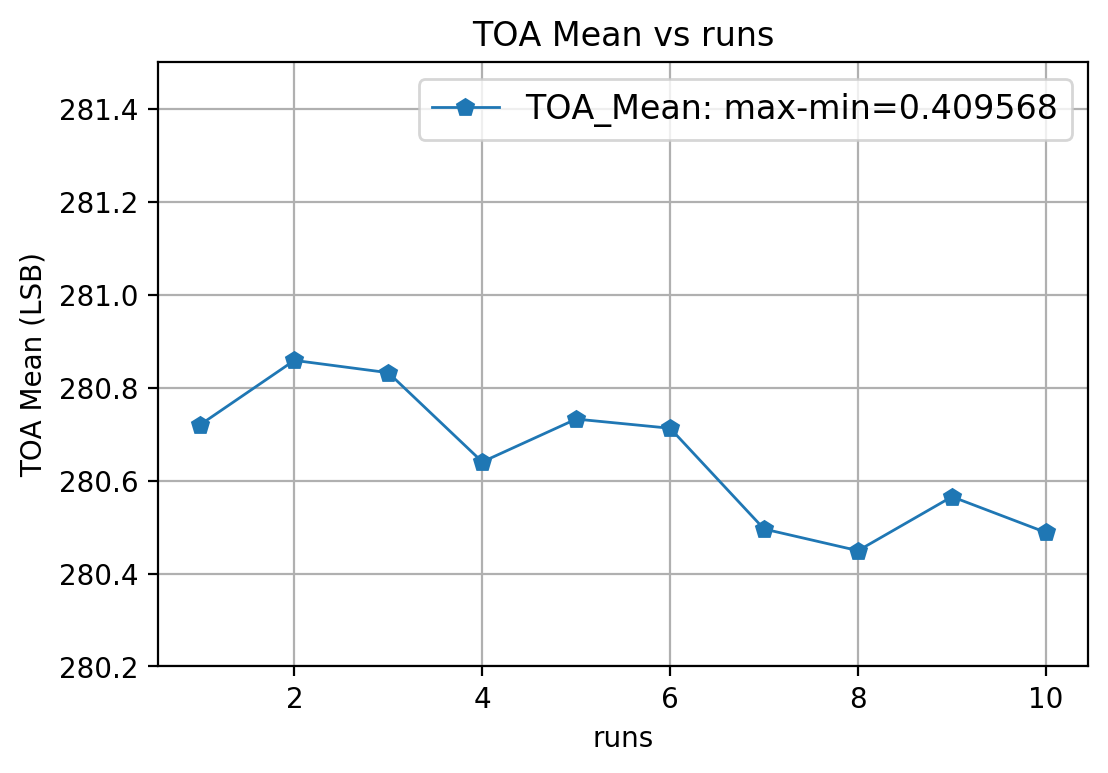

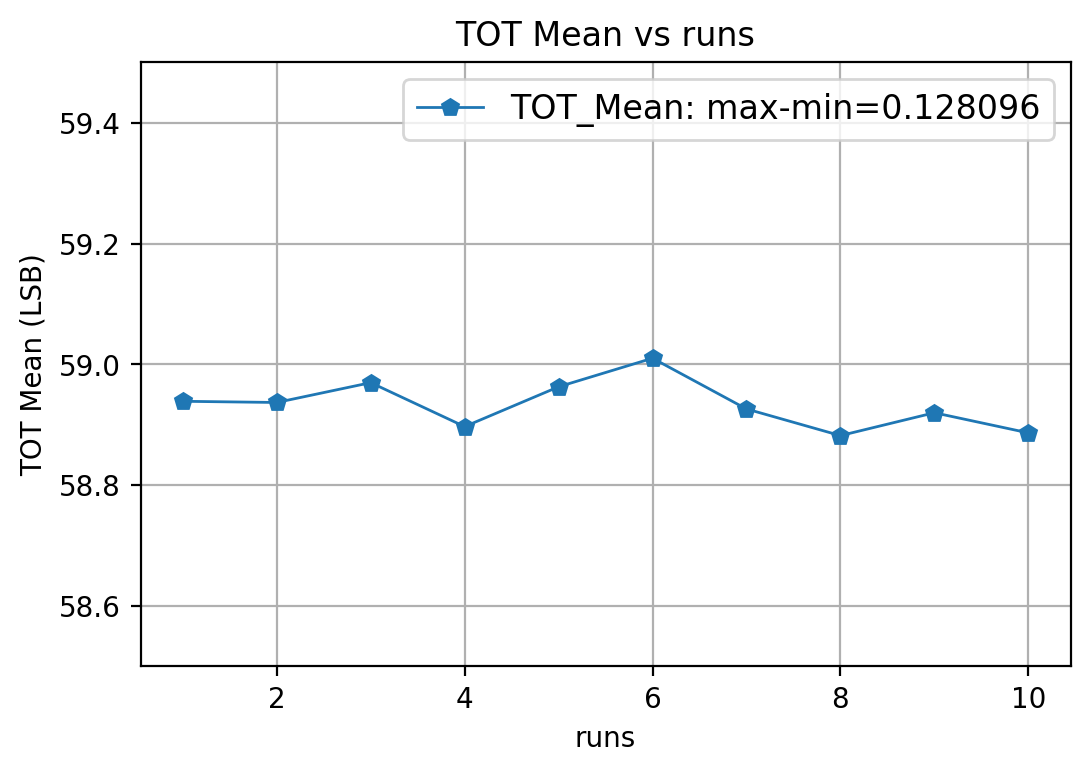

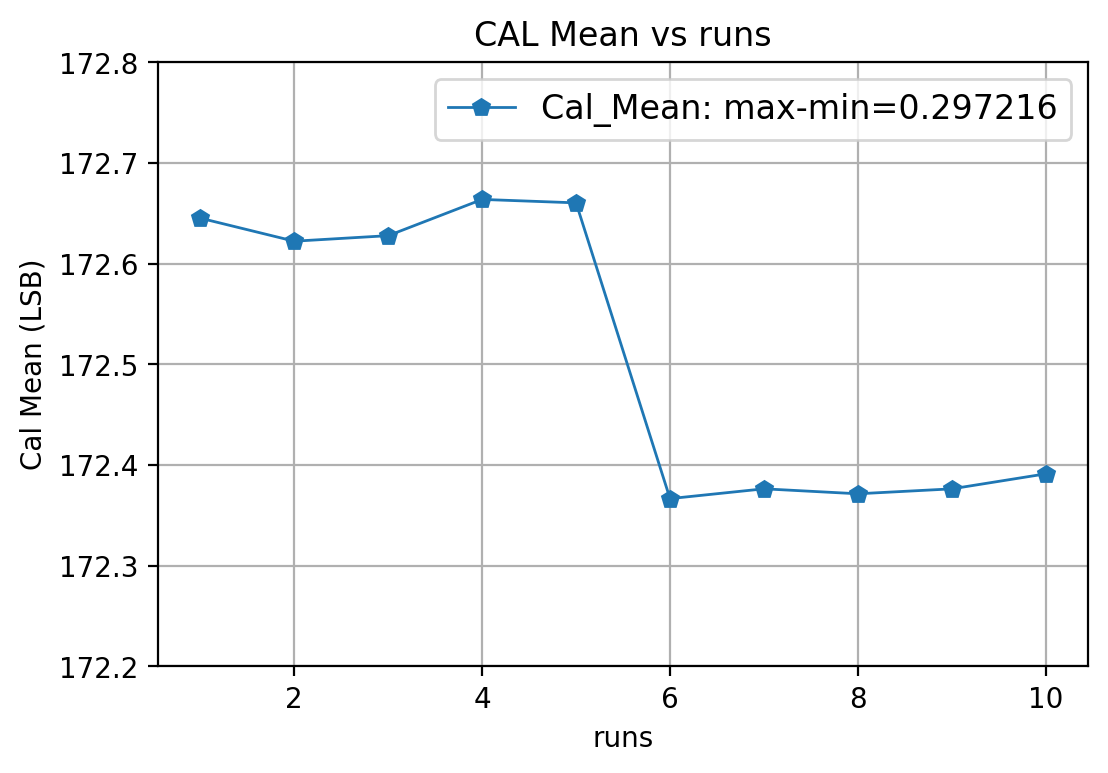

In [54]:
############## plot ###################
#
runs = [1,2,3,4,5,6,7,8,9,10]
fig, ax1 = plt.subplots(dpi=200)
ax1.plot(runs, toa_mu_list, marker = 'p', linestyle='-',linewidth=1, 
         label='TOA_Mean: max-min=%f'%(np.max(toa_mu_list)-np.min(toa_mu_list)) )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.set_ylim(bottom=280.2,top=281.5)
ax1.grid()
ax1.set(xlabel='runs', ylabel='TOA Mean (LSB)',
       title='TOA Mean vs runs')
ax1.legend(loc='best', fontsize = 'large')
plt.show()
plt.close(fig)

fig, ax1 = plt.subplots(dpi=200)
ax1.plot(runs, tot_mu_list, marker = 'p', linestyle='-',linewidth=1, 
         label='TOT_Mean: max-min=%f'%(np.max(tot_mu_list)-np.min(tot_mu_list)) )
ax1.set_ylim(bottom=58.5,top=59.5)
ax1.grid()
ax1.set(xlabel='runs', ylabel='TOT Mean (LSB)',
       title='TOT Mean vs runs')
ax1.legend(loc='best', fontsize = 'large')
plt.show()
plt.close(fig)

fig, ax1 = plt.subplots(dpi=200)
ax1.plot(runs, cal_mu_list, marker = 'p', linestyle='-',linewidth=1, 
         label='Cal_Mean: max-min=%f'%(np.max(cal_mu_list)-np.min(cal_mu_list)) )
ax1.set_ylim(bottom=172.2,top=172.8)
ax1.grid()
ax1.set(xlabel='runs', ylabel='Cal Mean (LSB)',
       title='CAL Mean vs runs')
ax1.legend(loc='best', fontsize = 'large')
plt.show()
plt.close(fig)